# Case Study on *Lok Sabha Elections 2024*


## About the dataset

This dataset provides comprehensive details of the Indian General Elections  2024, encompassing results for all constituencies across the country. It includes data on candidates, political parties, vote counts, and Results, offering valuable insights for political analysis, academic research, and data-driven decision-making.

Source: https://results.eci.gov.in/PcResultGenJune2024/index.htm

Data Features:
Constituency Information: Name and State
Candidate Details: Name, party affiliation, and votes(EVM, postal)
Election Results: "Won" or "Lost"
This dataset is an invaluable resource for comprehending the dynamics of the 2024 Indian General Elections, offering a detailed view of electoral outcomes and trends nationwide. Utilize it for your Data Science projects or to create impressive dashboards.

## Let's load the packages

In [ ]:
install.packages("tidyverse")
install.packages("janitor")
install.packages("here")
install.packages("repr")

library(repr)
library(tidyverse)
library(here)
library(ggplot2)
library(dplyr)
library(tidyr)
library(janitor)
library(readr)

## Let's upload the dataset

In [3]:
general_elections<-read_csv("/kaggle/input/lok-sabha-elections-2024/GE_2024_Results.csv")
general_elections<-general_elections %>% 
  rename(
    EVM_Votes=`EVM Votes`,
    Postal_Votes=`Postal Votes`,
    Total_Votes=`Total Votes`
  )
general_elections<-general_elections %>% 
  mutate(Postal_Votes = as.numeric(Postal_Votes)) %>% 
  mutate(Postal_Votes = ifelse(is.na(Postal_Votes), 0, Postal_Votes))
head(general_elections)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 8902 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): State, Constituency, Candidate, Party, Postal Votes, Result
dbl (4): ID, EVM Votes, Total Votes, % of Votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Postal_Votes = as.numeric(Postal_Votes)`.
Caused by warning:
! NAs introduced by coercion”


ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,% of Votes,Result
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost
6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914,0.45,Lost


*1. A few columns have been renamed to simplify our analysis process.*<br>
*2. Postal_Votes had been initialised as character column. We have changed the data type to numeric.*

In [4]:
n_distinct(general_elections$Party)
n_distinct(general_elections$State)

[1] 746

[1] 36

##### As we can see, a total of 746 parties contested for the Lok Sabha elections 2024 in 36 states


## Constituencies per State

In [5]:
general_elections_cons<-general_elections %>% 
  group_by(State) %>% 
  summarize(Constituency=n_distinct(Constituency))
head(general_elections_cons,15)

State,Constituency
<chr>,<int>
Andaman & Nicobar Islands,1
Andhra Pradesh,25
Arunachal Pradesh,2
Assam,14
Bihar,40
Chandigarh,1
Chhattisgarh,11
Dadra & Nagar Haveli and Daman & Diu,2
Goa,2


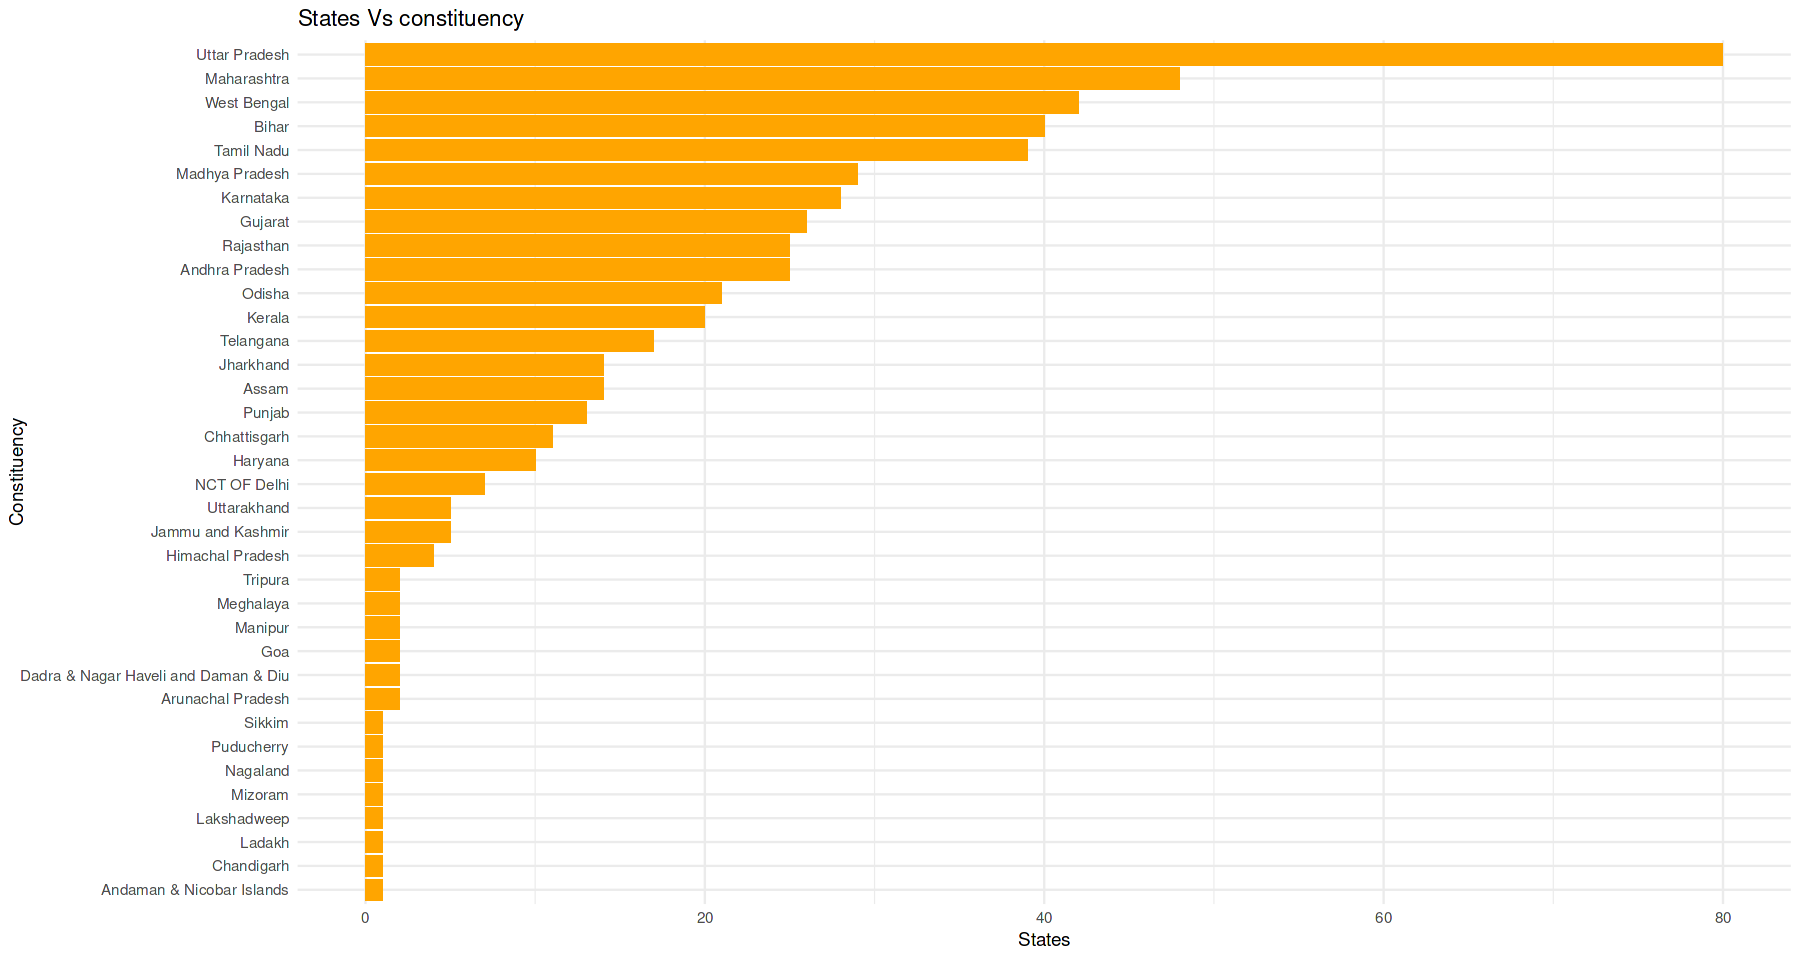

In [6]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(data=general_elections_cons, aes(x=Constituency,y=reorder(State,Constituency)))+
  geom_bar(stat="identity",fill="orange")+
  ggtitle("States Vs constituency")+
  xlab("States")+
  ylab("Constituency")+
  theme_minimal()

##### We see that Uttar Pradesh has the highest constituencies followed by Maharshtra and  West Bengal.

## Candidate Distribution per State

In [7]:
general_elections_can<-general_elections %>% 
  group_by(State) %>% 
  summarize(Candidate=n_distinct(Candidate))  #including NOTA
View(general_elections_can,15)


State,Candidate
<chr>,<int>
Andaman & Nicobar Islands,13
Andhra Pradesh,455
Arunachal Pradesh,15
Assam,143
Bihar,481
Chandigarh,20
Chhattisgarh,217
Dadra & Nagar Haveli and Daman & Diu,13
Goa,17


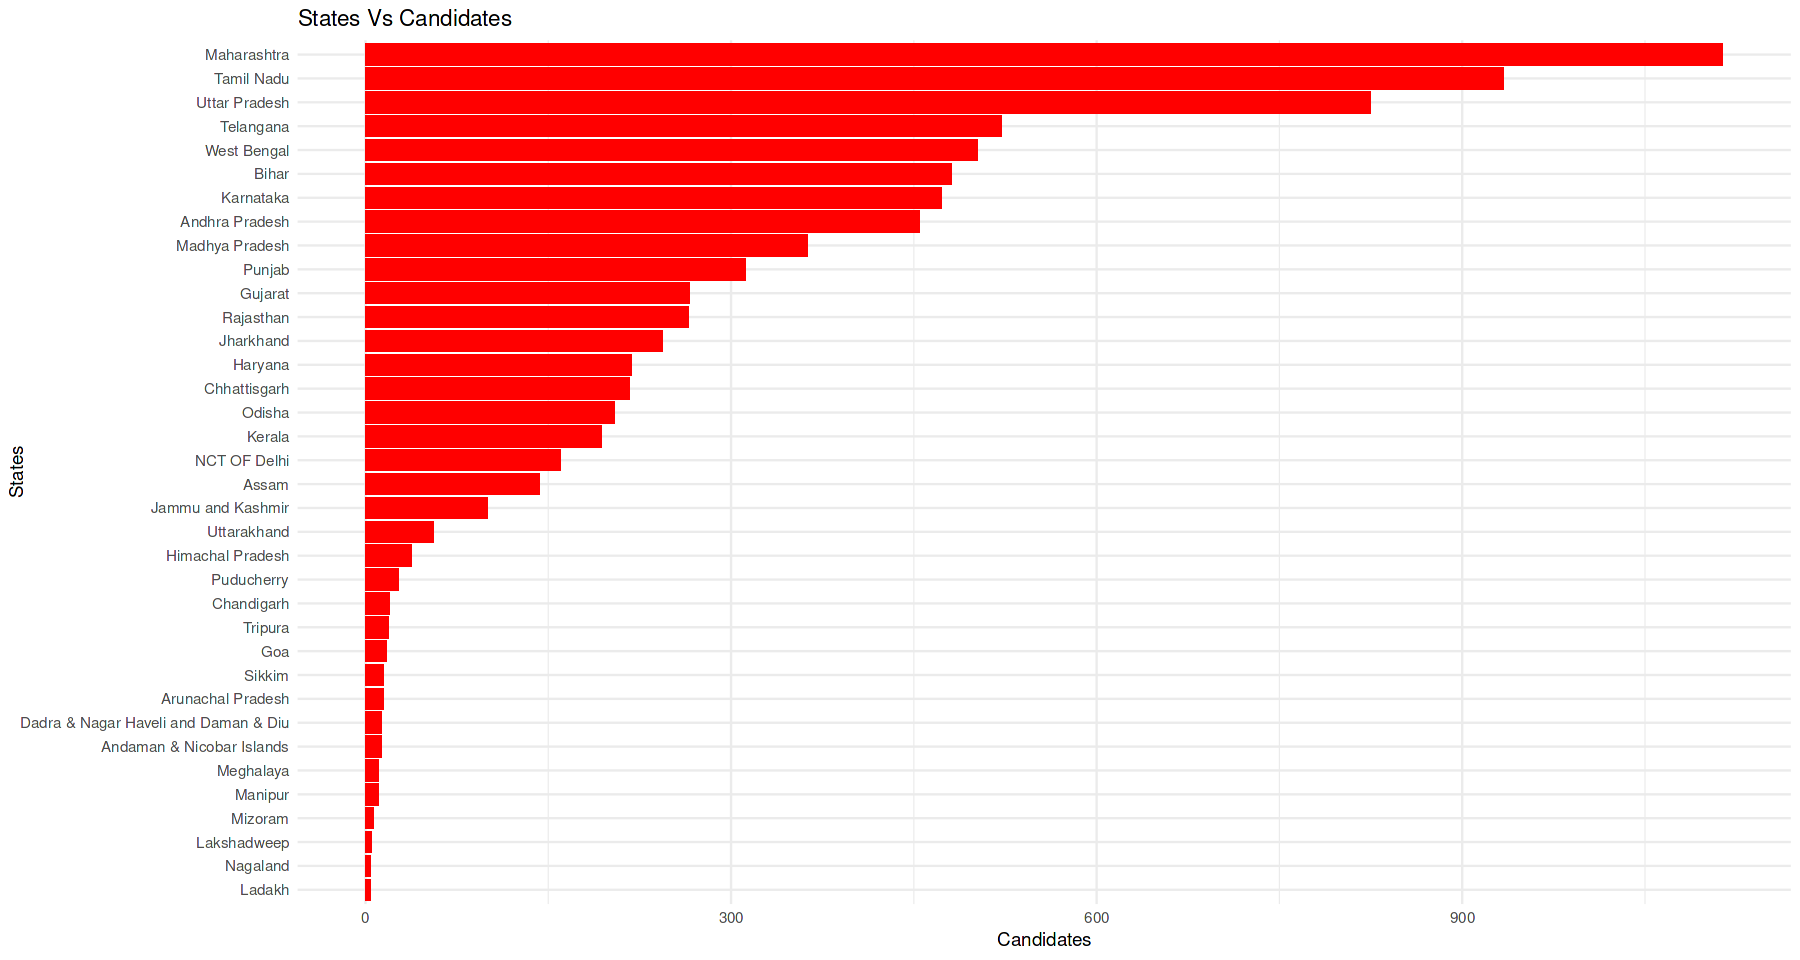

In [8]:
ggplot(data=general_elections_can, aes(x=Candidate,y=reorder(State,Candidate)))+
  geom_bar(stat="identity", fill="red")+
  ggtitle("States Vs Candidates")+
  ylab("States")+
  xlab("Candidates")+  
  theme_minimal()

##### It is evident that Maharashtra had the highest number of candidates contesting for the polls followed by Tamil Nadu and Uttar Pradesh. 

## State Wise Party Distribution

In [9]:
general_elections_parties<-general_elections %>% 
  group_by(State) %>% 
  summarise(Party=n_distinct(Party)) #including independents and NOTA
View(general_elections_parties)

State,Party
<chr>,<int>
Andaman & Nicobar Islands,9
Andhra Pradesh,68
Arunachal Pradesh,6
Assam,28
Bihar,98
Chandigarh,9
Chhattisgarh,34
Dadra & Nagar Haveli and Daman & Diu,7
Goa,8


##### Uttar Pradesh(166) had the highest number of parties contesting for the polls followed by Maharashtra(123) and Bihar(98)
*NOTE: List also includes the independents who contested from each state*

## Independents vs Party Candidates

In [10]:
independent_or_party<-general_elections %>% 
  filter(Candidate !="NOTA") %>% 
  mutate(Candidate_Type=ifelse(Party=="Independent", "Independent", "Party"))
head(independent_or_party,10)
candidate_count<-independent_or_party %>% 
  group_by(Candidate_Type) %>% 
  summarize(Count=n())
View(candidate_count)

ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,% of Votes,Result,Candidate_Type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won,Party
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost,Party
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost,Party
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost,Party
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost,Independent
6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914,0.45,Lost,Party
7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719,0.36,Lost,Party
8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542,0.27,Lost,Independent
9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506,1,507,0.25,Lost,Independent


Candidate_Type,Count
<chr>,<int>
Independent,3920
Party,4440


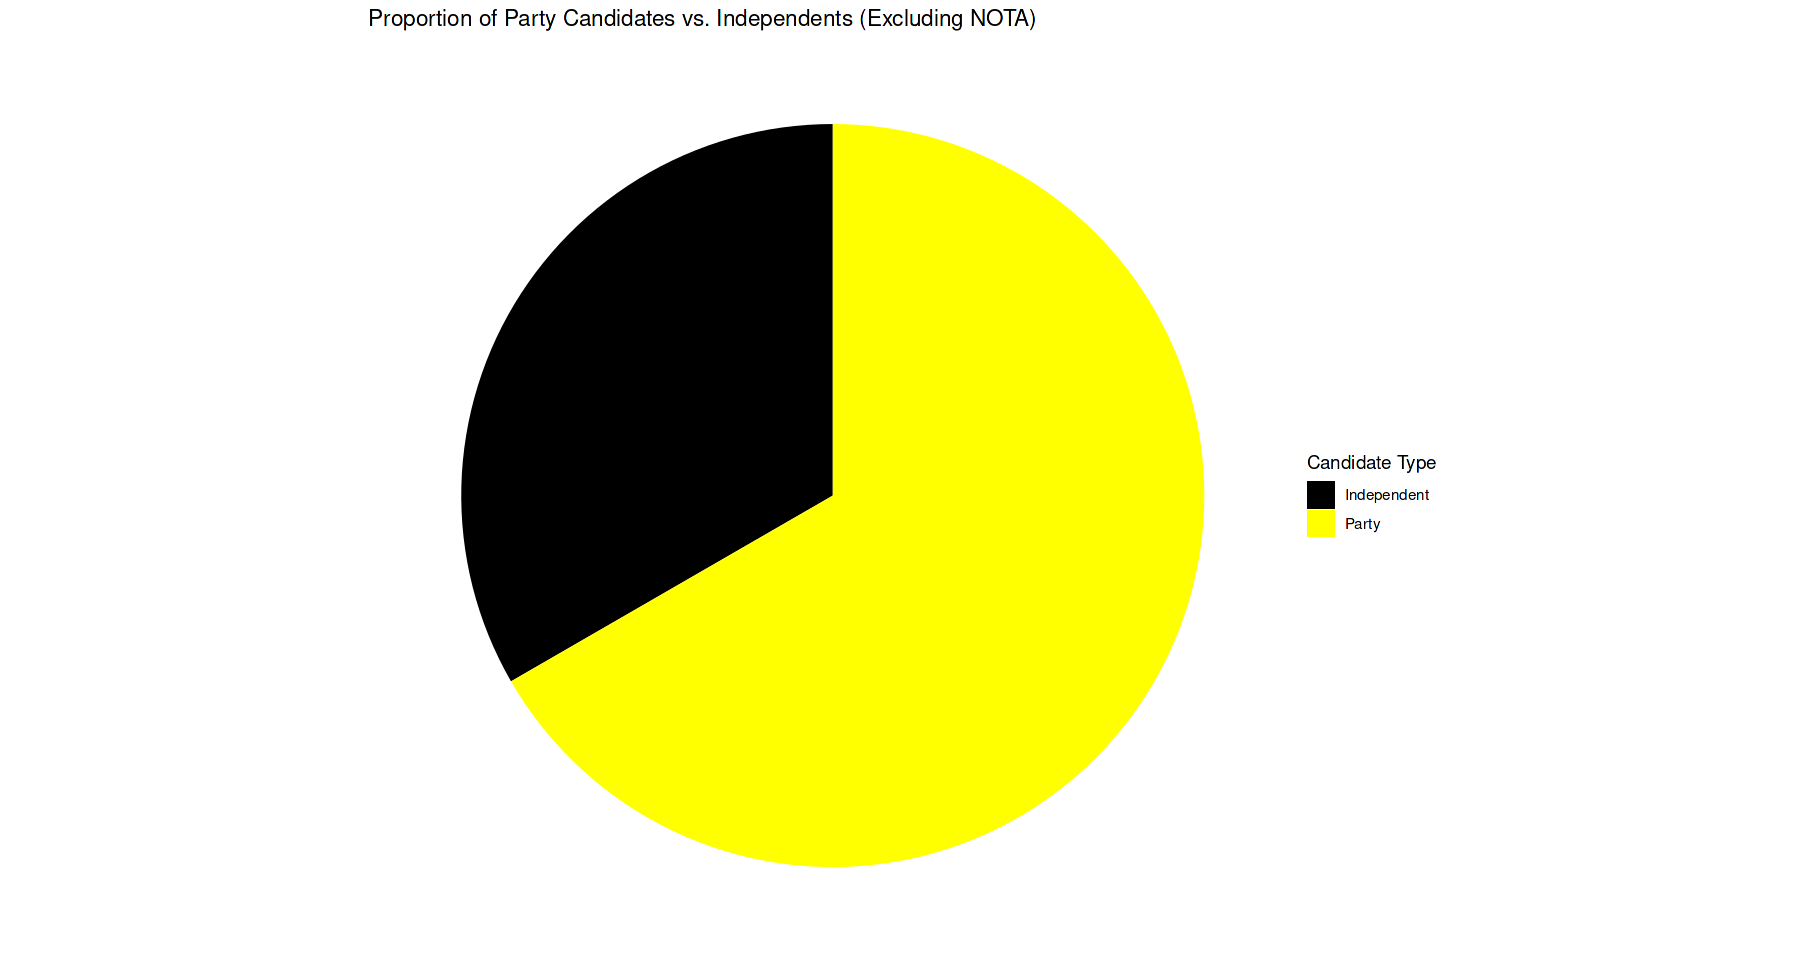

In [11]:
ggplot(data=candidate_count,aes(x="",y=Candidate_Type,fill=Candidate_Type))+
  geom_bar(stat="identity",width = 1)+
  coord_polar(theta = "y")+
  labs(title = "Proportion of Party Candidates vs. Independents (Excluding NOTA)",
       fill = "Candidate Type") +
  theme_void()+
  scale_fill_manual(values=c("Party"="yellow","Independent"="black"))


##### Majority of the candidates belong to a party. <br>
*This chart does not include the NOTA candidates*

## NOTA Vote Share per State

In [12]:
nota_votes<-general_elections %>%
  filter(Candidate=="NOTA") %>% 
  group_by(State) %>% 
  summarise(nvotes=sum(Total_Votes)) 
head(nota_votes,10)
total_votes<-general_elections %>% 
  filter(Candidate != "NOTA") %>% 
  group_by(State) %>% 
  summarise(tvotes=sum(Total_Votes))
head(total_votes,10)
vote_shares<-merge(nota_votes,total_votes,by=c("State"))
vote_shares<-vote_shares %>% 
  mutate(percentage=(nvotes/tvotes)*100)
head(vote_shares,10)

State,nvotes
<chr>,<dbl>
Andaman & Nicobar Islands,1809
Andhra Pradesh,402366
Arunachal Pradesh,7191
Assam,240301
Bihar,899616
Chandigarh,2912
Chhattisgarh,136111
Dadra & Nagar Haveli and Daman & Diu,6129
Goa,11165


State,tvotes
<chr>,<dbl>
Andaman & Nicobar Islands,200705
Andhra Pradesh,33326976
Arunachal Pradesh,716056
Assam,19819569
Bihar,42549333
Chandigarh,446363
Chhattisgarh,14925237
Dadra & Nagar Haveli and Daman & Diu,291869
Goa,895373


,State,nvotes,tvotes,percentage
,<chr>,<dbl>,<dbl>,<dbl>
1,Andaman & Nicobar Islands,1809,200705,0.9013228
2,Andhra Pradesh,402366,33326976,1.2073283
3,Arunachal Pradesh,7191,716056,1.0042511
4,Assam,240301,19819569,1.2124431
5,Bihar,899616,42549333,2.1142893
6,Chandigarh,2912,446363,0.6523838
7,Chhattisgarh,136111,14925237,0.9119520
8,Dadra & Nagar Haveli and Daman & Diu,6129,291869,2.0999147
9,Goa,11165,895373,1.2469663


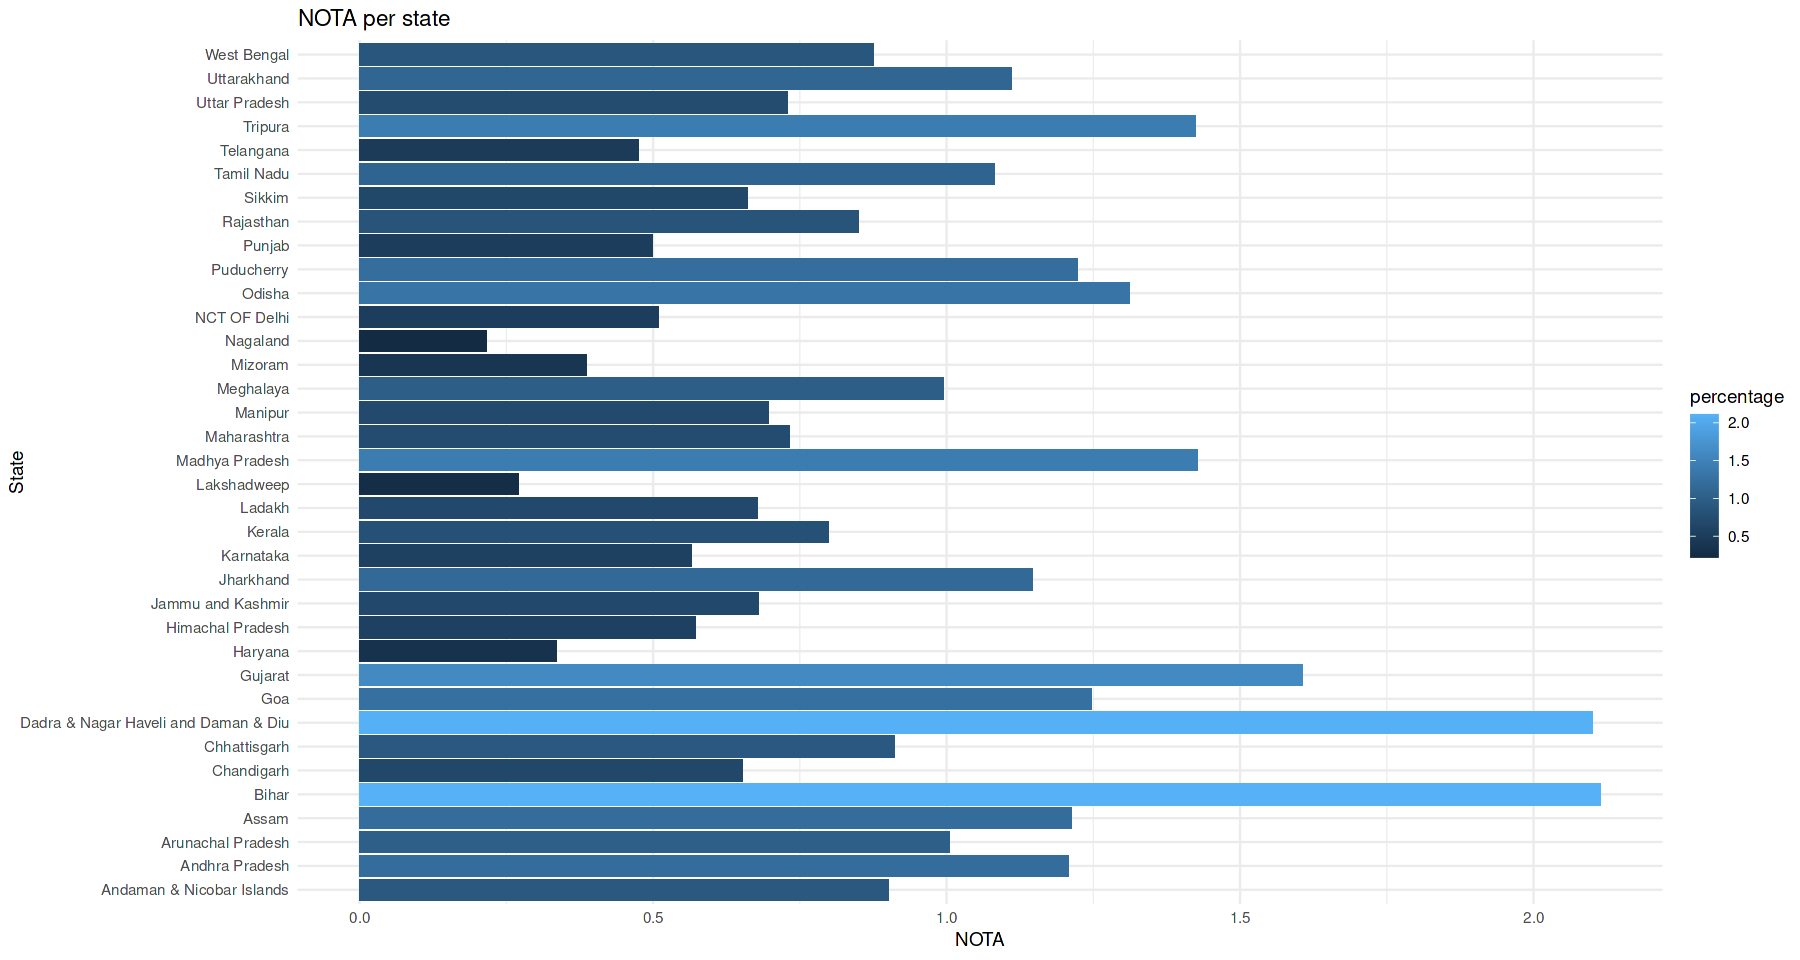

In [13]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(data=vote_shares,aes(x=percentage,y=State,fill=percentage))+
  geom_bar(stat="identity")+
  ggtitle("NOTA per state")+
  xlab("NOTA")+
  ylab("State")+
  theme_minimal()

##### It is evident that Bihar recorded the highest number of NOTA votes followed by Dadra & Nagar Haveli and Daman & Diu.

## EVM vs Postal Votes per State 

In [14]:
evm_total<-general_elections %>% 
  group_by(State) %>% 
  summarise(EVM_Total = sum(EVM_Votes))
head(evm_total)
postal_total<-general_elections %>% 
  group_by(State) %>% 
  summarise(Postal_Total=sum(Postal_Votes))
head(postal_total)
evm_or_postal<-merge(evm_total,postal_total,by=c("State"))
evm_or_postal_long<-evm_or_postal %>% 
  pivot_longer(
    cols=c(EVM_Total,Postal_Total),
    names_to="Vote_Type",
    values_to="Vote"
  )
head(evm_or_postal_long)

State,EVM_Total
<chr>,<dbl>
Andaman & Nicobar Islands,201992
Andhra Pradesh,33258505
Arunachal Pradesh,689824
Assam,19953259
Bihar,43309971
Chandigarh,448548


State,Postal_Total
<chr>,<dbl>
Andaman & Nicobar Islands,522
Andhra Pradesh,470837
Arunachal Pradesh,33423
Assam,106611
Bihar,138978
Chandigarh,727


State,Vote_Type,Vote
<chr>,<chr>,<dbl>
Andaman & Nicobar Islands,EVM_Total,201992
Andaman & Nicobar Islands,Postal_Total,522
Andhra Pradesh,EVM_Total,33258505
Andhra Pradesh,Postal_Total,470837
Arunachal Pradesh,EVM_Total,689824
Arunachal Pradesh,Postal_Total,33423


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


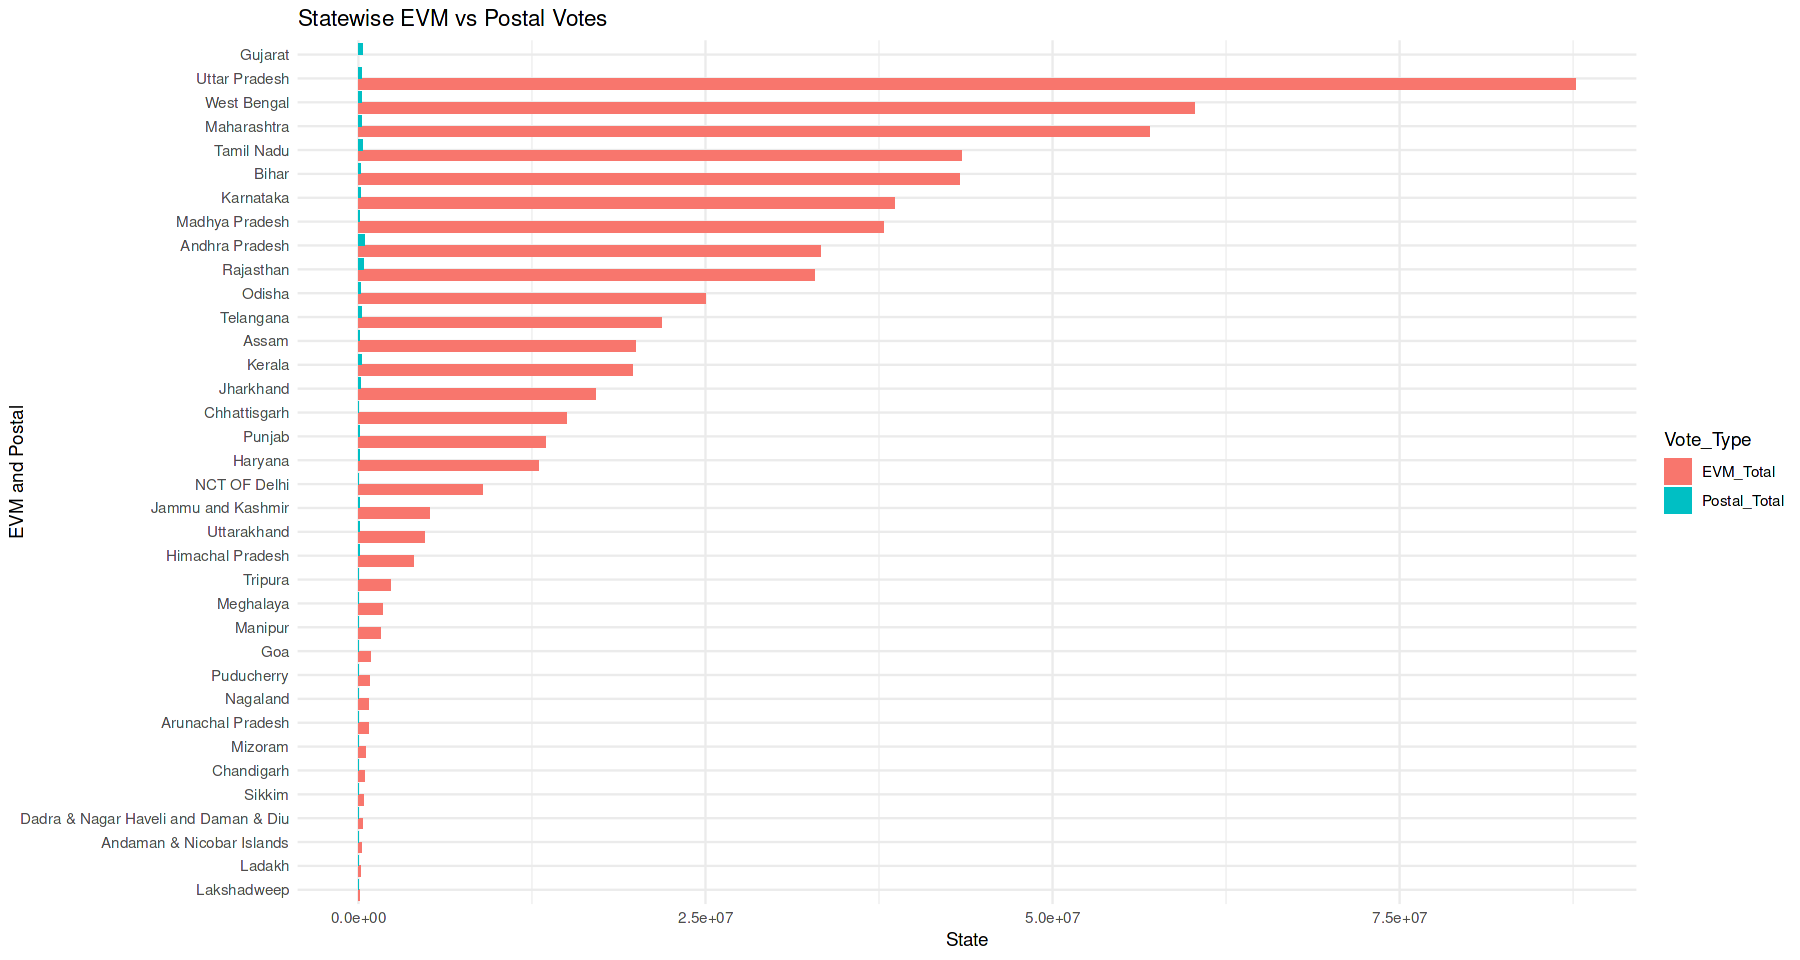

In [15]:
ggplot(data=evm_or_postal_long,aes(x=Vote,y=reorder(State,Vote),fill=Vote_Type))+
  geom_bar(stat="identity",position="dodge")+
  ggtitle("Statewise EVM vs Postal Votes")+
  xlab("State")+
  ylab("EVM and Postal")+
  theme_minimal()

##### We can clearly see that majority of the votes in all the states have been casted through EVM's.

## Winning Candidate per Constituency

In [16]:
winning_candidate<-general_elections %>%
  group_by(State,Constituency) %>% 
  filter(Total_Votes==max(Total_Votes)) %>% 
  ungroup()
head(winning_candidate,15)

ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,% of Votes,Result
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
14,Andhra Pradesh,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,786149,10832,796981,61.25,Won
30,Andhra Pradesh,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,750027,12042,762069,57.50,Won
46,Andhra Pradesh,Ananthapur,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,755862,12383,768245,53.33,Won
68,Andhra Pradesh,Araku (ST),GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96,Won
82,Andhra Pradesh,Bapatla (SC),KRISHNA PRASAD TENNETI,Telugu Desam,706757,10736,717493,55.16,Won
98,Andhra Pradesh,Chittoor(SC),DAGGUMALLA PRASADA RAO,Telugu Desam,765536,12535,778071,54.84,Won
118,Andhra Pradesh,Eluru,PUTTA MAHESH KUMAR,Telugu Desam,737644,8707,746351,54.00,Won
132,Andhra Pradesh,Guntur,DR CHANDRA SEKHAR PEMMASANI,Telugu Desam,851020,13928,864948,60.68,Won


## Winning Party per State

In [17]:
winning_party<-winning_candidate %>% 
  group_by(State,Party) %>%
  summarise(Votes=max(Total_Votes)) %>% 
  arrange(State,desc(Votes)) %>% 
  slice(1)
View(winning_party)


`summarise()` has grouped output by 'State'. You can override using the
`.groups` argument.


State,Party,Votes
<chr>,<chr>,<dbl>
Andaman & Nicobar Islands,Bharatiya Janata Party,102436
Andhra Pradesh,Telugu Desam,907467
Arunachal Pradesh,Bharatiya Janata Party,205417
Assam,Indian National Congress,1471885
Bihar,Bharatiya Janata Party,649331
Chandigarh,Indian National Congress,216657
Chhattisgarh,Bharatiya Janata Party,1050351
Dadra & Nagar Haveli and Daman & Diu,Bharatiya Janata Party,121074
Goa,Bharatiya Janata Party,257326


In [ ]:
highest_votes<-winning_party %>% 
  group_by(Party) %>% 
  summarise(Votes=sum(Votes)) %>% 
  arrange(desc(Votes))
View(highest_votes)

##### The Bharatitya Janata Party(BJP) secured the highest votes followed by Indian National Congress(INC) and All India Trinamool Congress(AITC).

## Let Us Analyse This By A Map Of India

In [ ]:
install.packages("devtools")
install.packages("sf")
install.packages("rnaturalearth")
install.packages("rnaturalearthdata")
install.packages("rnaturalearthhires")
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(rnaturalearthhires)
library(devtools)

In [19]:
devtools::install_github("ropensci/rnaturalearthhires")
india_map<-ne_states(country="India", returnclass="sf")
india_map<-india_map %>%
  mutate(name = case_when(
    name == "Andaman and Nicobar" ~ "Andaman and Nicobar Islands",
    name == "Dadara and Nagar Havelli" ~ "Dadra and Nagar Haveli and Daman and Diu",
    TRUE ~ name
  ))
view(india_map)
map_data<-india_map %>% 
  left_join(winning_party,by=c("name"="State"))


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpRA9Vkc/remotes2130e599c6/ropensci-rnaturalearthhires-dd1e210/DESCRIPTION’ ... OK
* preparing ‘rnaturalearthhires’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rnaturalearthhires_1.0.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



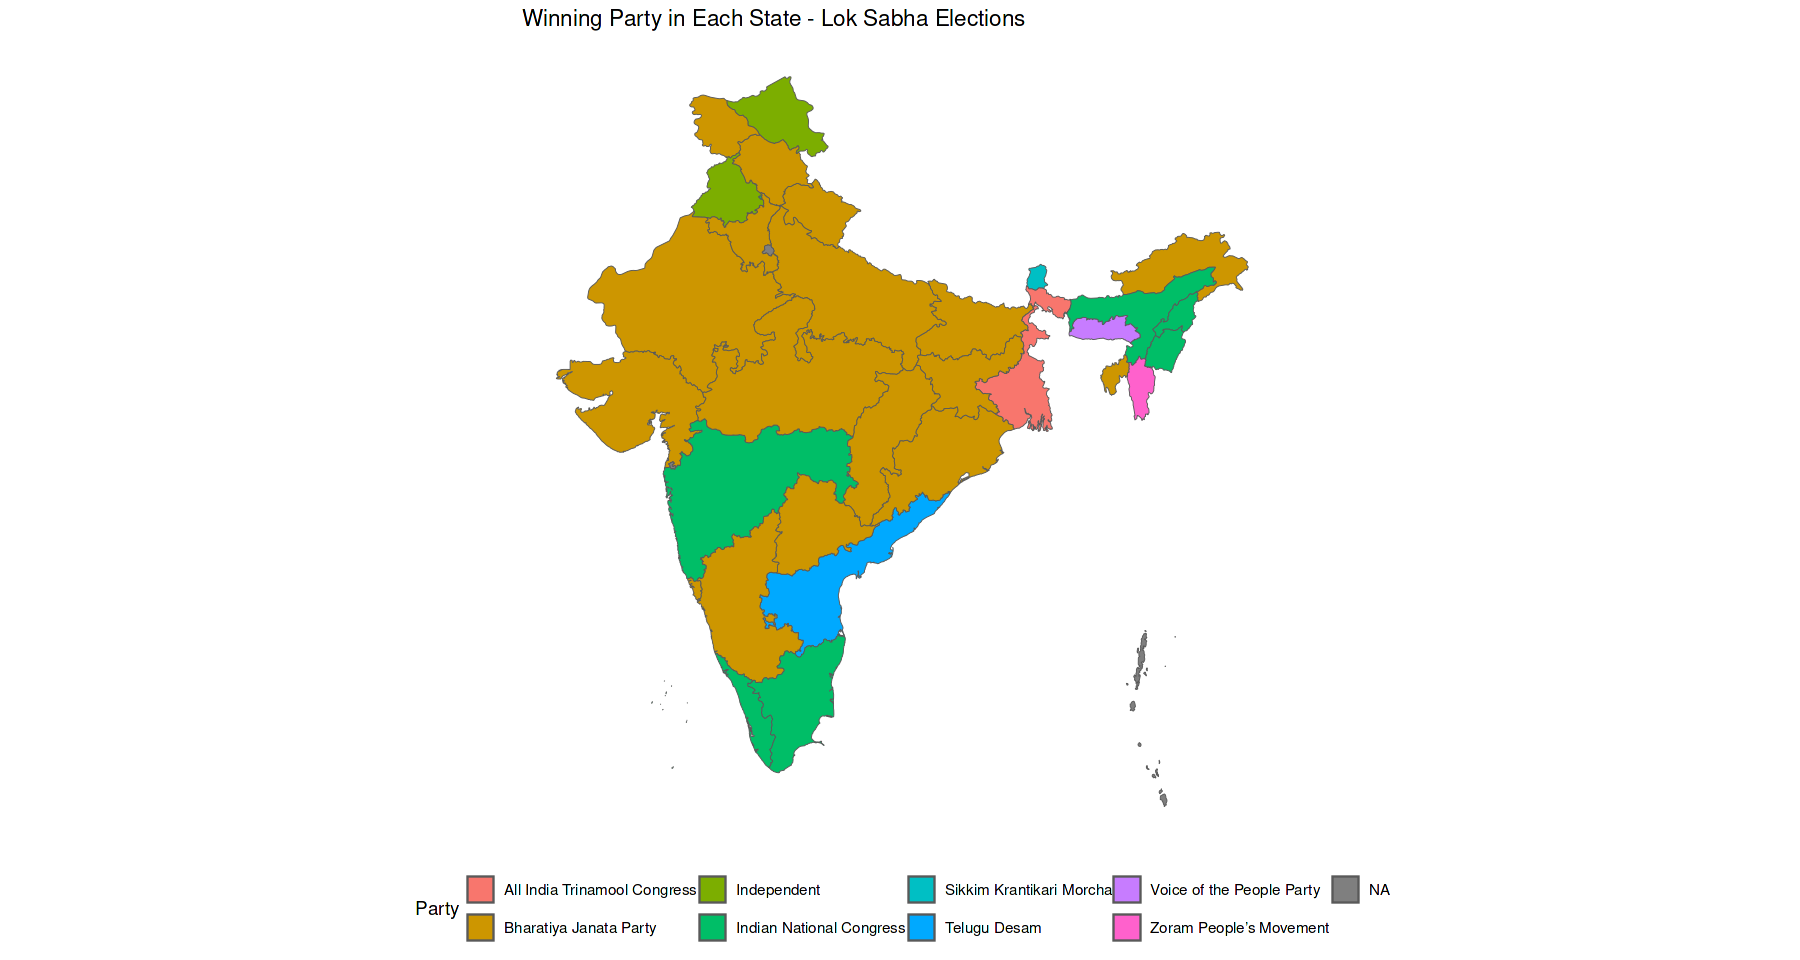

In [20]:
ggplot(data = map_data) +
  geom_sf(aes(fill = Party)) +
  labs(title = "Winning Party in Each State - Lok Sabha Elections",
       fill = "Party") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.position = "bottom")

# Conclusion :

The 2024 Lok Sabha elections marked a significant milestone in India's democratic process, with the Bharatiya Janata Party (BJP) emerging as the dominant force, securing the maximum votes across the nation. This analysis delved into various dimensions of the electoral outcomes, providing insights into voter behavior, regional variations, candidate distribution and state-wise constituencies.